In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import integrate

# Численное вычисление интеграла

Задача: необходимо вычислить приближенное значение определенного интеграла $$\int_0^1 \frac{4}{1+x^2}dx = \pi,$$ используя правила прямоугольников, трапеций и Симпсона.

#### График подынтегральной функции:

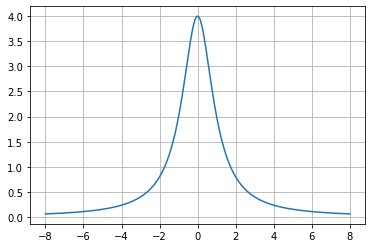

In [33]:
xx = np.linspace(-8,8,500)
yy = 4/(1+xx*xx)
plt.plot(xx, yy)
plt.grid()
pass

#### Правило (средних) прямоугольников

Пусть $$a = x_0 < x_1 < \dots < x_{n-1} < x_n = b,$$ 

тогда $$x_{k + \frac{1}{2}} = \frac{x_k - x_{k-1}}{2} \quad (k=0,1,\dots,n-1)$$
$$\int_a^b f(x) dx \approx \sum_{k=0}^{n-1} f\left(x_{k+\frac{1}{2}}\right) \cdot (x_k - x_{k-1})$$

для равноотстоящих узлов ($\ x_k - x_{k-1}=h$) получаем $$\int_a^b f(x) dx \approx h\sum_{k=0}^{n-1} f\left(x_{k+\frac{1}{2}}\right)$$

Вычислим приближенное значение интеграла с помощью правила прямоугольников с числом узлов $n=2$:

In [6]:
a = 0
b = 1
n = 2
h = (b - a)/n
x = np.arange(a + h/2, b, h)
y = 4/(1+x*x)
I_rect = h*sum(y)
I_rect

3.1623529411764704

Рассчитаем значение интеграла для $n=4,8,16,32,64,128$, сравним со значением числа $\pi$ и занесем данные в таблицу: 

In [72]:
trect = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for i in range(7):
    n = 2**(i+1)
    a = 0
    b = 1
    h = (b - a)/n
    x = np.arange(a + h/2, b, h)
    y = 4/(1+x*x)
    I_rect = h*sum(y)
    trect[i][0] = n
    trect[i][1] = I_rect
    trect[i][2] = I_rect-np.pi

In [62]:
pd.set_option('display.float_format', '{:.16f}'.format)

In [63]:
pd.DataFrame(trect, columns=["n","Значение", "Погрешность"])

,n,Значение,Погрешность
0,2,3.1623529411764704,0.0207602875866773
1,4,3.1468005183939427,0.0052078648041496
2,8,3.1428947295916889,0.0013020760018958
3,16,3.1419181743085600,0.0003255207187669
4,32,3.1416740337963374,0.0000813802065442
5,64,3.1416129986418473,0.0000203450520542
6,128,3.1415977398528145,0.0000050862630214


С удвоением числа узлов погрешность уменьшается примерно в 4 раза.

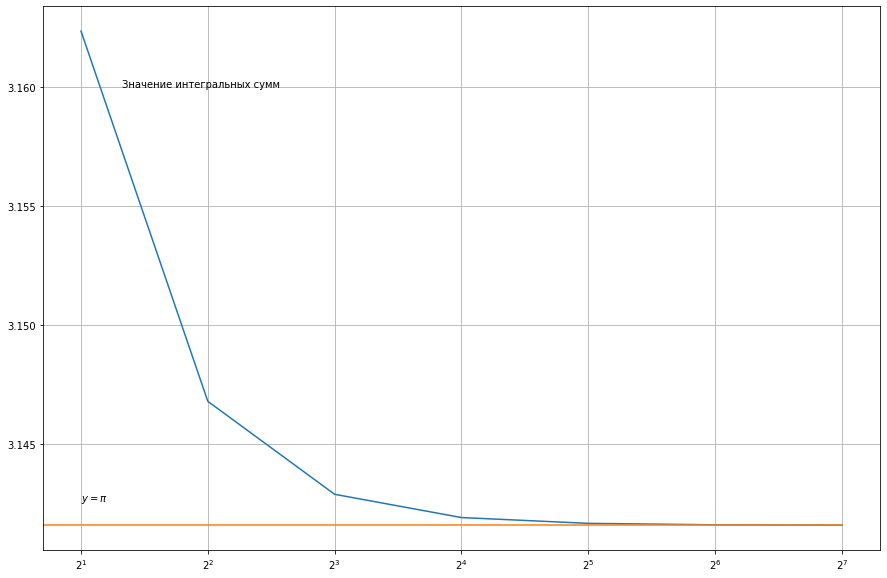

In [116]:
xx = [2,4,8,16,32,64,128]
yrect = [trect[0][1],trect[1][1],trect[2][1],trect[3][1],trect[4][1],trect[5][1],trect[6][1]]
x1 = np.linspace(0,128,2)
y1 = [np.pi,np.pi]
plt.figure(figsize=(15, 10))
plt.xscale('log', base = 2)
plt.plot(xx, yrect)
plt.plot(x1,y1)
plt.text(2.5, 3.16, "Значение интегральных сумм")
plt.text(2, np.pi+0.001, "$y=\pi$")
plt.grid()
pass

#### Правило Трапеций

$$\int_a^b f(x) dx \approx \sum_{k=1}^n \frac{f(x_k) + f(x_k)}{2} \cdot (x_k - x_{k-1})$$

для равноотстоящих узлов получаем $$\int_a^b f(x) dx \approx h\left( \frac{f(x_0) + f(x_n)}{2} + f(x_1) + f(x_2) + \dots + f(x_{n-1}) \right).$$

Вычислим приближенное значение интеграла с помощью правила трапеций с числом узлов $n=2$:

In [105]:
a = 0
b = 1
n = 2
h = (b - a)/n
x = np.linspace(a, b, n + 1)
y = 4/(1+x*x)
I_trapz = integrate.trapz(y, x)
I_trapz

3.1

Рассчитаем значение интеграла для $n=4,8,16,32,64,128$, сравним со значением числа $\pi$ и занесем данные в таблицу:

In [18]:
ttrapz = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for i in range(7):
    a = 0
    b = 1
    n = 2**(i+1)
    h = (b - a)/n
    x = np.linspace(a, b, n + 1)
    y = 4/(1+x*x)
    I_trapz = integrate.trapz(y, x)
    ttrapz[i][0] = n
    ttrapz[i][1] = I_trapz
    ttrapz[i][2] = abs(I_trapz-np.pi)
ttrapz

[[2, 3.1, 0.04159265358979303],
 [4, 3.131176470588236, 0.010416183001557222],
 [8, 3.1389884944910893, 0.0026041590987038177],
 [16, 3.140941612041389, 0.0006510415484042298],
 [32, 3.1414298931749745, 0.00016276041481866343],
 [64, 3.1415519634856555, 4.069010413765284e-05],
 [128, 3.141582481063752, 1.0172526041074548e-05]]

In [117]:
pd.set_option('display.float_format', '{:.16f}'.format)
pd.DataFrame(ttrapz, columns=["n","Значение", "Погрешность"])

,n,Значение,Погрешность
0,2,3.1000000000000001,0.0415926535897930
1,4,3.1311764705882359,0.0104161830015572
2,8,3.1389884944910893,0.0026041590987038
3,16,3.1409416120413889,0.0006510415484042
4,32,3.1414298931749745,0.0001627604148187
5,64,3.1415519634856555,0.0000406901041377
6,128,3.1415824810637520,0.0000101725260411


При удвоении числа узлов погрешность также уменьшается в 4 раза.

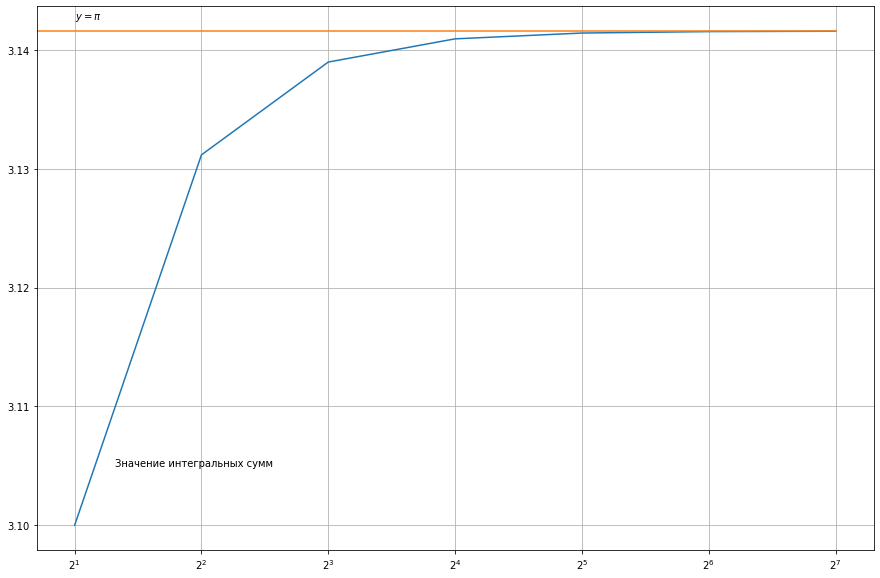

In [115]:
xx = [2,4,8,16,32,64,128]
ytrapz = [ttrapz[0][1],ttrapz[1][1],ttrapz[2][1],ttrapz[3][1],ttrapz[4][1],ttrapz[5][1],ttrapz[6][1]]
x1 = np.linspace(0,128,2)
y1 = [np.pi,np.pi]
plt.figure(figsize=(15, 10))
plt.xscale('log', base = 2)
plt.plot(xx, ytrapz)
plt.plot(x1,y1)
plt.text(2.5, 3.105, "Значение интегральных сумм")
plt.text(2, np.pi+0.001, "$y=\pi$")
plt.grid()
pass

#### Правило Симпсона

Вычислим приближенное значение интеграла с помощью формулы Симпсона с числом узлов $n=2$:

In [15]:
a = 0
b = 1
n = 2
x = np.linspace(a, b, n + 1)
y = 4/(1+x*x)
I_simps = integrate.simps(y, x)
I_simps

3.1333333333333333

In [17]:
tsimps = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for i in range(7):
    a = 0
    b = 1
    n = 2**(i+1)
    h = (b - a)/n
    x = np.linspace(a, b, n + 1)
    y = 4/(1+x*x)
    I_simps = integrate.simps(y, x)
    tsimps[i][0] = n
    tsimps[i][1] = I_simps
    tsimps[i][2] = abs(I_simps-np.pi)
tsimps

[[2, 3.1333333333333333, 0.008259320256459812],
 [4, 3.1415686274509804, 2.4026138812693887e-05],
 [8, 3.1415925024587064, 1.511310867563509e-07],
 [16, 3.141592651224822, 2.364971329882337e-09],
 [32, 3.141592653552836, 3.695710404372221e-11],
 [64, 3.141592653589216, 5.773159728050814e-13],
 [128, 3.1415926535897842, 8.881784197001252e-15]]

In [20]:
pd.set_option('display.float_format', '{:.16f}'.format)
pd.DataFrame(tsimps, columns=["n","Значение", "Погрешность"])

,n,Значение,Погрешность
0,2,3.1333333333333333,0.0082593202564598
1,4,3.1415686274509804,0.0000240261388127
2,8,3.1415925024587064,0.0000001511310868
3,16,3.1415926512248218,0.0000000023649713
4,32,3.1415926535528360,0.0000000000369571
5,64,3.1415926535892158,0.0000000000005773
6,128,3.1415926535897842,0.0000000000000089


Здесь, по сравнению с предыдущими методами, погрешность уменьшается значительно быстрее, в несколько сотен раз.

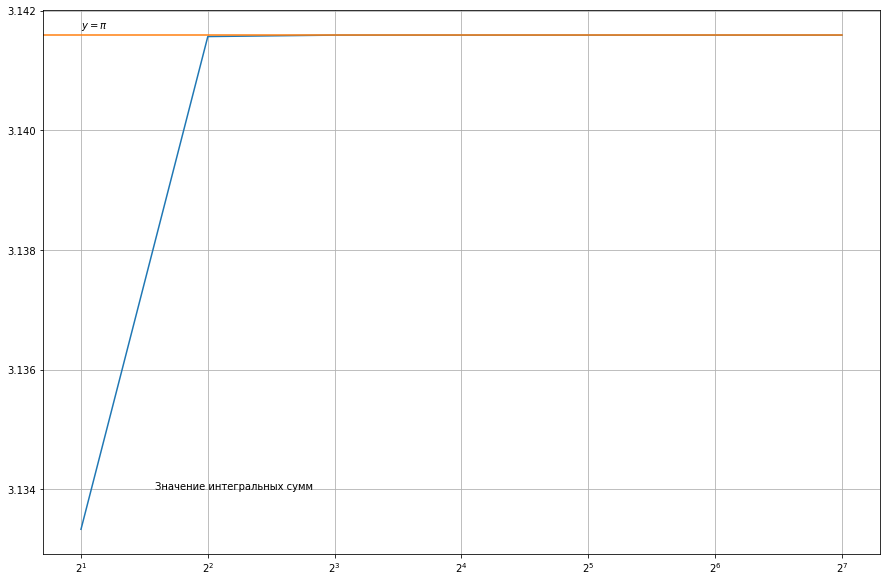

In [114]:
xx = [2,4,8,16,32,64,128]
ysimps = [tsimps[0][1],tsimps[1][1],tsimps[2][1],tsimps[3][1],tsimps[4][1],tsimps[5][1],tsimps[6][1]]
x1 = np.linspace(0,128,2)
y1 = [np.pi,np.pi]
plt.figure(figsize=(15, 10))
plt.xscale('log', base = 2)
plt.plot(xx, ysimps)
plt.plot(x1,y1)
plt.text(3, 3.134, "Значение интегральных сумм")
plt.text(2, 3.1417, "$y=\pi$")
plt.grid()
pass

## Сравнение

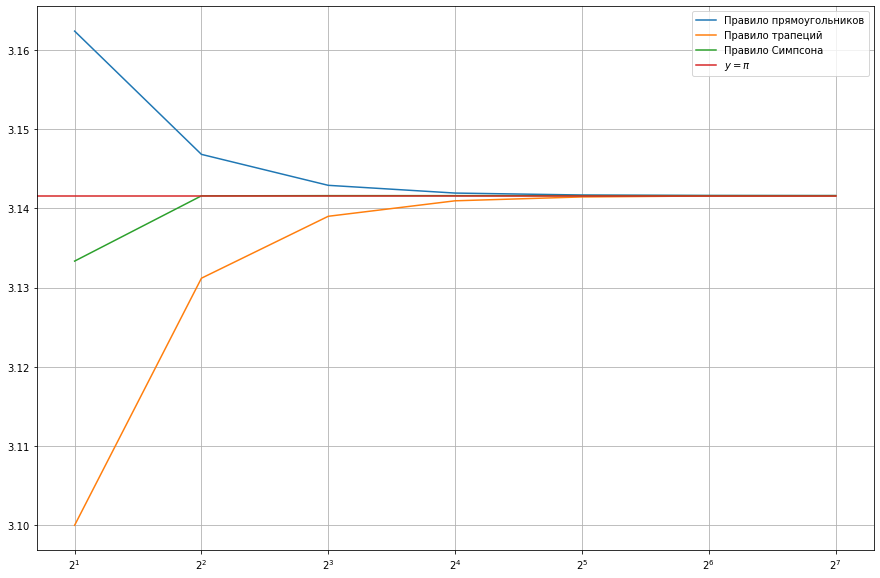

In [113]:
xx = [2,4,8,16,32,64,128]
plt.figure(figsize=(15, 10))
plt.plot(xx,yrect,label='Правило прямоугольников')
plt.plot(xx,ytrapz,label='Правило трапеций')
plt.plot(xx,ysimps,label='Правило Симпсона')
plt.plot(x1,y1,label='$y=\pi$')
plt.xscale('log', base = 2)
plt.legend()
plt.grid()
pass

## Вывод
Для вычисления интегралов более точным является метод Симпсона. При увеличении числа узлов погрешность уменьшается в сотни раз, а потом и вовсе перестает изменяться. Возможной причиной этого может являться возможность взятия интеграла в элементарных функциях.